Q1 - Linear Congruential Generator

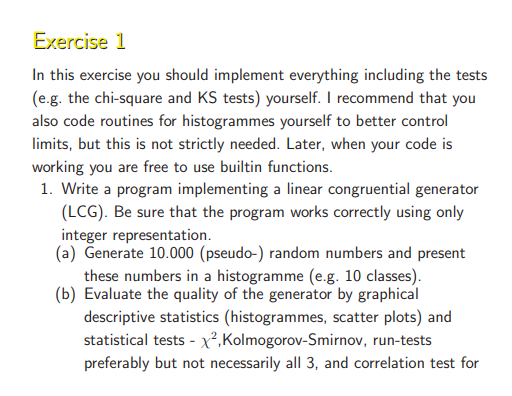

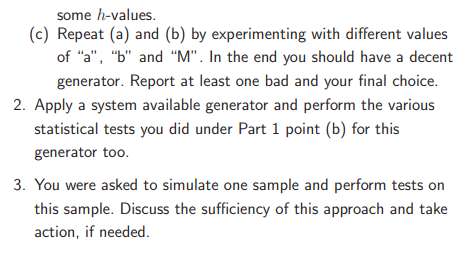

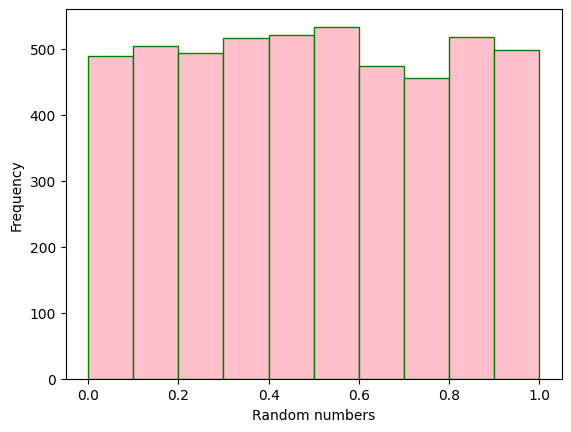

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

#a = 5 # multiplier
#c = 1 # shift
#M = 16 # modulus
#seed = 3 # fixed seed for reproducibility
#n = 10000 # number of pseudo-random numbers to generate
#x0 = 3 # the start value

M = 655368
a = 129
c = 26461
n = 5000
x0 = 9
random.seed(seed) #  Set the random seed

def LCG(x0, a, c, M, n):
    result = []
    x = x0
    for i in range(n):
        x_new = ( a*x +c) % M
        result.append(x_new/M) # Normalize to [0,1)
        x = x_new
    return result

lcg_values = LCG(x0, a, c, M, n)

# Plot the histograms of the generated random numbers

# Define no. of classes
classes = 10

plt.hist(lcg_values, bins=classes, edgecolor='green',color='pink')
plt.xlabel('Normalized values')
plt.ylabel('Frequency')
plt.show()

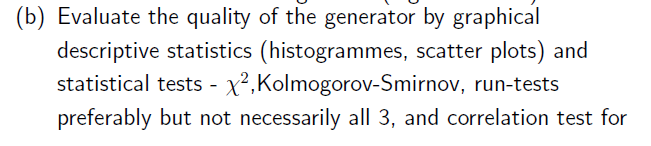

In [135]:
import numpy as np

# Count how many values fall into each bin
k = 10  # number of bins
n_observed, bin_edges = np.histogram(lcg_values, bins=k, range=(0, 1))
n_expected = [n / k] * k  # same count in each bin
T = np.sum((n_observed - n_expected) ** 2 / n_expected)

print("Chi-square statistic:", T)

Chi-square statistic: 7.466


In [136]:
# Chi-Square test

from scipy.stats import chi2

Range = np.max(lcg_values) - np.min(lcg_values)
bin_width = Range / classes #Divide the Range into Equal Bins
bin_edges = np.linspace(0, 1, classes + 1) #defines equally spaced bin edges over the full interval [0,1], creates 11 edges → which means 10 bins

# Count observed frequencies in generated data
observed, _ = np.histogram(lcg_values, bins=bin_edges) #frequency vector: How many of your generated values fell into each bin

# Calculate the expected frequency of each bin assuming uniform distribution
# Will be the same for every bin
expected = np.full(classes, n / classes)

# Compute Chi-squared test statistic
T = np.sum((observed - expected) ** 2 / expected)
print(f"The observed test statistic is: {T:.4f}") # The observed test statistic is: 10.5280

# Degrees of freedom
df = classes - 1
alpha = 0.05

# Critical value from chi-squared distribution
chi_crit = chi2.ppf(1 - alpha, df)
print(f"The critical value is: {chi_crit:.4f}") # The critical value is: 16.9190

# P-value
p_value = chi2.sf(T, df)
print(f"The p-value is: {p_value:.4f}") # The p-value is: 0.3095

The observed test statistic is: 7.4660
The critical value is: 16.9190
The p-value is: 0.5887


- The decision rule for the Chi-Squared test is based on comparing the observed test statistic to a critical value. If \( \chi^2_{\text{observed}} > \chi^2_{\text{critical}} \), we reject the null hypothesis \( H_0 \), which states that the generated numbers follow a uniform distribution. Otherwise, we do not reject \( H_0 \).

- Specifically:
  - If \( T > \chi^2_{\text{critical}} \) ⇒ **Reject the null hypothesis**
  - If \( T \leq \chi^2_{\text{critical}} \) ⇒ **Do not reject the null hypothesis**

- The *p*-value in the context of a \( \chi^2 \) test represents the probability of obtaining a test statistic at least as extreme as the observed value, assuming that the null hypothesis is true.

- Decision rule based on the *p*-value:
  - If **p-value** \( < \alpha \) (e.g., 0.05) ⇒ **Reject the null hypothesis**
  - If **p-value** \( \geq \alpha \) ⇒ **Do not reject the null hypothesis**


#### Kolmogorov-Smirnov test

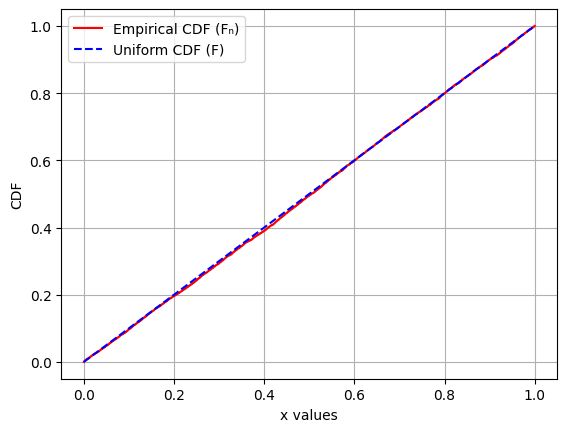

In [113]:
# Kolmogorov-Smirnov test
import numpy as np
import matplotlib.pyplot as plt

# Assuming lcg_values is already generated and normalized to [0,1)
lcg_sorted = np.sort(lcg_values)  # sort values for EDF
n = len(lcg_values)

# Empirical CDF: y = i/n for i = 1 to n
empirical_cdf = np.arange(1, n + 1) / n

# Theoretical CDF of Uniform(0,1) = x
theoretical_cdf = lcg_sorted  # since F(x) = x for uniform(0,1)

# Step 4: Plotting
plt.step(lcg_sorted, empirical_cdf, where='post', label='Empirical CDF (Fₙ)', color='red')
plt.plot(theoretical_cdf, theoretical_cdf, label='Uniform CDF (F)', color='blue', linestyle='--')
#plt.title("Kolmogorov-Smirnov Test Visualization")
plt.xlabel("x values")
plt.ylabel("CDF")
plt.legend()
plt.grid(True)
plt.show()

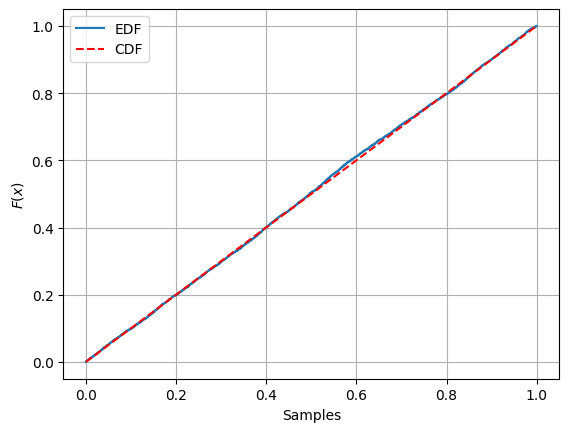

In [98]:
# simpler code:

# # Sort samples
lcg_values_sorted = np.sort(lcg_values)
n = len(lcg_values)

# Empirical CDF: y = i/n for i = 1 to n
edf = np.arange(1, n + 1) / n

# Plot the EDF
plt.step(lcg_values_sorted, edf, where='post')

# PLot the CDF of the uniform distribution
xx = np.linspace(0, 1, len(lcg_values))
cdf = xx
plt.plot(xx, cdf, '--r')
plt.xlabel('Samples')
plt.ylabel(r'$F(x)$')
plt.legend(['EDF', 'CDF'])
plt.grid()
plt.show()


We first compute

$$
D_{n} = \operatorname*{sup}_x \{ F_{n}(x) - F(x) \}
$$

the adjusted test statistic is then given by

$$
\left(\sqrt{n} + 0.12 + \frac{0.11} { \sqrt{n} } \right) D_{n}
$$

We then compare using some known critical values from the Kolmogorovs distribution (we use the "all parameters known" case). For a significance level of 0.95 we have that the critical value is 1.358.

In [126]:
# Compute test statistic
D_n = np.max( np.abs( empirical_cdf - theoretical_cdf ) )
n = len(empirical_cdf)
test = ( np.sqrt(n) + 0.12 + 0.11 / np.sqrt(n) ) * D_n

print(f"The test statistic is: {test:.4f}.") # The test statistic is: 0.0142
print("For significance level of 0.950 we have the critical value as 1.358.") # For significance level of 0.950 we have the critical value as 1.358


The test statistic is: 6.2576.
For significance level of 0.950 we have the critical value as 1.358.


If the adjusted test statistic > critical value:

🚫 Reject the null hypothesis: the data does not come from the uniform distribution.

Otherwise:

✅ Fail to reject the null: the data is consistent with a uniform distribution.

#### Run-test

Assesses whether a sequence of data points exhibits randomness or a pattern. 

Using UP/DOWN run test from Knuth. With $n$ generated random numbers we observed the number of runs of length $1, \ldots, 5$ and $\geq 6$ which we record in a vector $\boldsymbol{R}$.


In [127]:
# Run test II
def run_lengths(vector):
    count = 0
    max_length = 0  # Track the maximum length of an increasing sequence
    current_length = 1  # Initialize the length of the current increasing sequence
    R = [0] * 6  # Initialize the vector to record lengths of increasing sequences

    for i in range(1, len(vector)):
        if vector[i] > vector[i - 1]:
            count += 1
            current_length += 1  # Increase the length of the current increasing sequence
        else:
            if current_length >= 6:
                R[5] += 1  # Increment the count for lengths greater than or equal to 6
            else:
                R[current_length - 1] += 1  # Increment the count for lengths less than 6
            max_length = max(max_length, current_length)  # Update the maximum length if needed
            current_length = 1  # Reset the length of the current increasing sequence
    
    # Check if the last sequence is longer than any previous sequences
    if current_length >= 6:
        R[5] += 1
    else:
        R[current_length - 1] += 1

    return R

# Input generated numbers
R = run_lengths(lcg_values)
print("R vector:", R)


R vector: [1654, 2067, 912, 278, 62, 9]


The test statistic is calculated by:

$$
Z = \frac{1}{n-6} ( \boldsymbol{R} - n \boldsymbol{B} )^{T} A ( \boldsymbol{R} - n \boldsymbol{B} )
$$

where

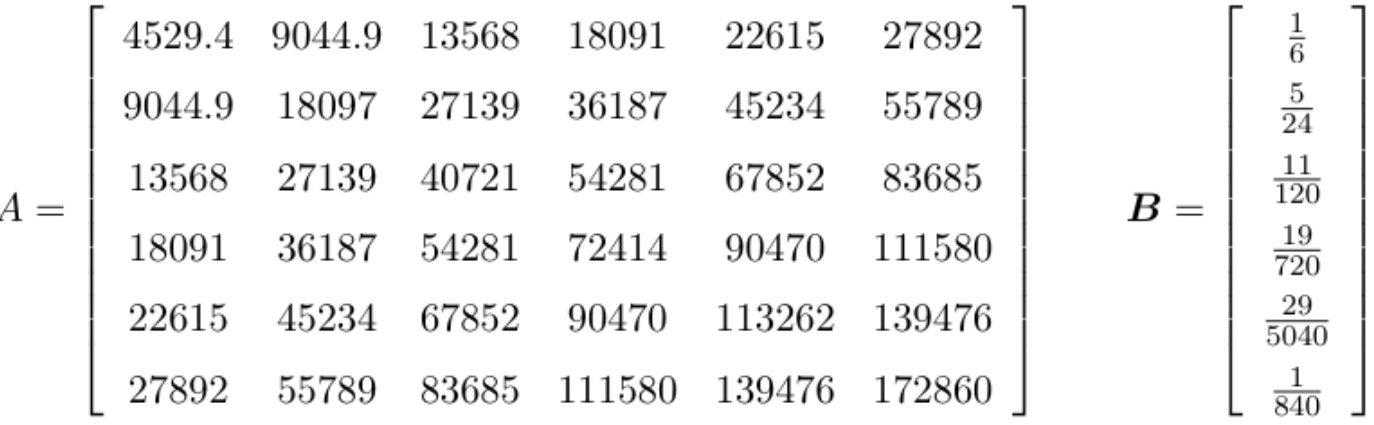

The test statistic is then compared to a $\chi^2(6)$ distribution using $n>4000$.


In [101]:
# Define A and B
A = np.array([[4529.4, 9044.9, 13568, 18091, 22615, 27892],
              [9044.9, 18097, 27139, 36187, 45234, 55789],
              [13568, 27139, 40721, 54281, 67852, 83685],
              [18091, 36187, 54281, 72414, 90470, 111580],
              [22615, 45234, 67852, 90470, 113262, 139476],
              [27892, 55789, 83685, 111580, 139476, 172860]])

B = np.array([1/6, 5/24, 11/120, 19/720, 29/5040, 1/840])

# Compute test statistic
n = len(lcg_values)
mat_mul = ( R - n * B ).T @ A @ ( R - n * B )
Z = 1 / (n - 6) * mat_mul
print(f"The test statistic is: {Z:.4f}") # The test statistic is: 295.8799

# Calculate critical value using df=6
# Use significance of alpha=0.05
df = 6
alpha = 0.05
chi_squared = chi2.ppf(1 - alpha, df)
print(f"The critical value is: {chi_squared:.4f}") # The critical value is: 12.5916

# Calculate the p-value under the observed test statistic
p_value = chi2.sf(Z, df)
print(f"The p-value is: {p_value:.4f}") # The p-value is: 0.0000


The test statistic is: 6.6972
The critical value is: 12.5916
The p-value is: 0.3498


#### 2D scatter plot of 
(
U
𝑖
,
U
𝑖
+
1
) to check for correlation patterns:

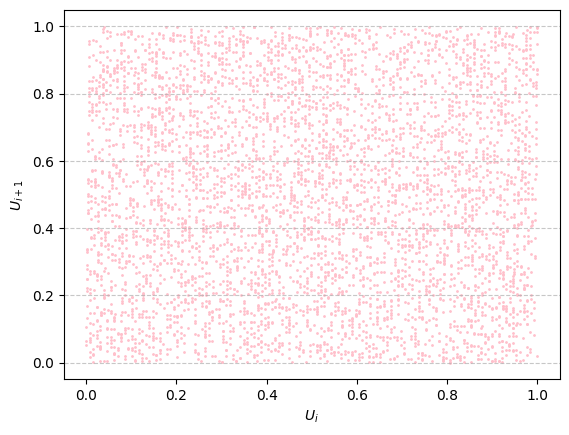

In [102]:
U_i = lcg_values[:-1]
U_i_plus_1 = lcg_values[1:]

# Scatter plot
plt.scatter(U_i, U_i_plus_1, color='pink', s=1)
#plt.title("Scatter plot of (Uᵢ, Uᵢ₊₁)")
plt.xlabel(r'$U_{i}$')
plt.ylabel(r'$U_{i+1}$')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



#### (c) Repeat (a) and (b) by experimenting with different values of $a$, $b$ and $M$. In the end you should have a decent generator. Report at least one bad and your final choice.

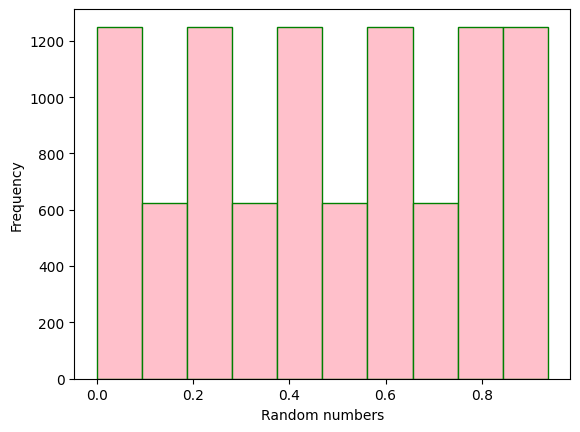

In [137]:
a = 5
c = 1
n = 10000
x0 = 3
M = 16

lcg_values2 = LCG(x0, a, c, M, n)

# Plot the histograms of the generated random numbers
classes = 10

plt.hist(lcg_values2, bins=classes, edgecolor='green',color='pink')
plt.xlabel('Random numbers')
plt.ylabel('Frequency')
plt.show()

In [138]:
# Chi-Square test

from scipy.stats import chi2

Range = np.max(lcg_values2) - np.min(lcg_values2)
bin_width = Range / classes #Divide the Range into Equal Bins
bin_edges = np.linspace(0, 1, classes + 1) #defines equally spaced bin edges over the full interval [0,1], creates 11 edges → which means 10 bins

# Count observed frequencies in generated data
observed, _ = np.histogram(lcg_values2, bins=bin_edges) #frequency vector: How many of your generated values fell into each bin

# Calculate the expected frequency of each bin assuming uniform distribution
# Will be the same for every bin
expected = np.full(classes, n / classes)

# Compute Chi-squared test statistic
T = np.sum((observed - expected) ** 2 / expected)
print(f"The observed test statistic is: {T:.4f}") # The observed test statistic is: 10.5280

# Degrees of freedom
df = classes - 1
alpha = 0.05

# Critical value from chi-squared distribution
chi_crit = chi2.ppf(1 - alpha, df)
print(f"The critical value is: {chi_crit:.4f}") # The critical value is: 16.9190

# P-value
p_value = chi2.sf(T, df)
print(f"The p-value is: {p_value:.4f}") # The p-value is: 0.3095

The observed test statistic is: 937.5000
The critical value is: 16.9190
The p-value is: 0.0000


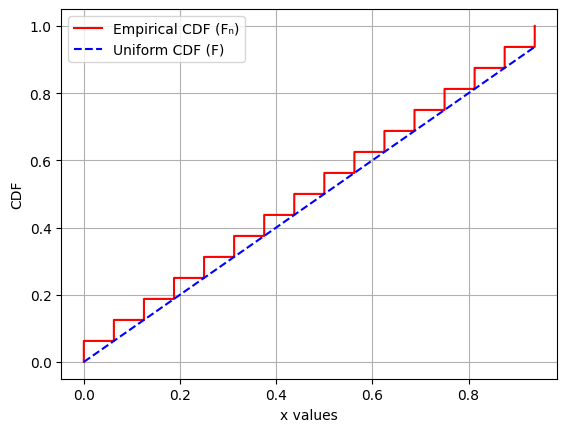

In [139]:
# Kolmogorov-Smirnov test
import numpy as np
import matplotlib.pyplot as plt

# Assuming lcg_values is already generated and normalized to [0,1)
lcg_sorted2 = np.sort(lcg_values2)  # sort values for EDF
n = len(lcg_values2)

# Empirical CDF: y = i/n for i = 1 to n
empirical_cdf2 = np.arange(1, n + 1) / n

# Theoretical CDF of Uniform(0,1) = x
theoretical_cdf2 = lcg_sorted2  # since F(x) = x for uniform(0,1)

# Step 4: Plotting
plt.step(lcg_sorted2, empirical_cdf2, where='post', label='Empirical CDF (Fₙ)', color='red')
plt.plot(theoretical_cdf2, theoretical_cdf2, label='Uniform CDF (F)', color='blue', linestyle='--')
#plt.title("Kolmogorov-Smirnov Test Visualization")
plt.xlabel("x values")
plt.ylabel("CDF")
plt.legend()
plt.grid(True)
plt.show()

In [140]:
# Compute test statistic
D_n = np.max( np.abs( empirical_cdf2 - theoretical_cdf2 ) )
n = len(theoretical_cdf2)
test = ( np.sqrt(n) + 0.12 + 0.11 / np.sqrt(n) ) * D_n

print(f"The test statistic is: {test:.4f}.") # The test statistic is: 0.0142
print("For significance level of 0.950 we have the critical value as 1.358.") # For significance level of 0.950 we have the critical value as 1.358


The test statistic is: 6.2576.
For significance level of 0.950 we have the critical value as 1.358.


In [141]:
# Run test II
def run_lengths(vector):
    count = 0
    max_length = 0  # Track the maximum length of an increasing sequence
    current_length = 1  # Initialize the length of the current increasing sequence
    R = [0] * 6  # Initialize the vector to record lengths of increasing sequences

    for i in range(1, len(vector)):
        if vector[i] > vector[i - 1]:
            count += 1
            current_length += 1  # Increase the length of the current increasing sequence
        else:
            if current_length >= 6:
                R[5] += 1  # Increment the count for lengths greater than or equal to 6
            else:
                R[current_length - 1] += 1  # Increment the count for lengths less than 6
            max_length = max(max_length, current_length)  # Update the maximum length if needed
            current_length = 1  # Reset the length of the current increasing sequence
    
    # Check if the last sequence is longer than any previous sequences
    if current_length >= 6:
        R[5] += 1
    else:
        R[current_length - 1] += 1

    return R

# Input generated numbers
R = run_lengths(lcg_values2)
print("R vector:", R)


R vector: [1250, 1250, 1250, 625, 0, 0]


In [ ]:
# Define A and B
A = np.array([[4529.4, 9044.9, 13568, 18091, 22615, 27892],
              [9044.9, 18097, 27139, 36187, 45234, 55789],
              [13568, 27139, 40721, 54281, 67852, 83685],
              [18091, 36187, 54281, 72414, 90470, 111580],
              [22615, 45234, 67852, 90470, 113262, 139476],
              [27892, 55789, 83685, 111580, 139476, 172860]])

B = np.array([1/6, 5/24, 11/120, 19/720, 29/5040, 1/840])

# Compute test statistic
n = len(lcg_values2)
mat_mul = ( R - n * B ).T @ A @ ( R - n * B )
Z = 1 / (n - 6) * mat_mul
print(f"The test statistic is: {Z:.4f}") # The test statistic is: 1118.8268

# Calculate critical value using df=6
# Use significance of alpha=0.05
df = 6
alpha = 0.05
chi_squared = chi2.ppf(1 - alpha, df)
print(f"The critical value is: {chi_squared:.4f}") # The critical value is: 12.5916

# Calculate the p-value under the observed test statistic
p_value = chi2.sf(Z, df)
print(f"The p-value is: {p_value:.4f}") # The p-value is: 0.0000

The test statistic is: 1118.8268
The critical value is: 12.5916
The p-value is: 0.0000


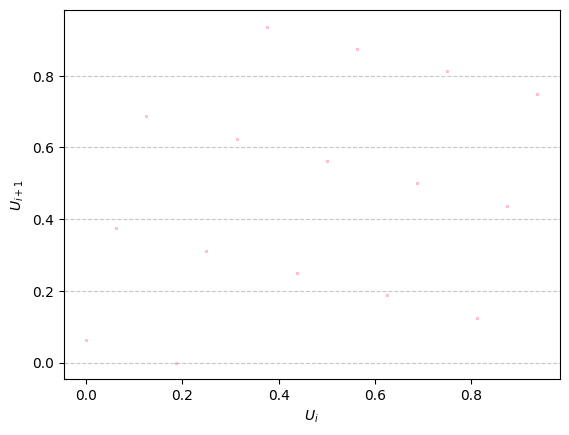

In [131]:
U_i = lcg_values2[:-1]
U_i_plus_1 = lcg_values2[1:]

# Scatter plot
plt.scatter(U_i, U_i_plus_1, color='pink', s=1)
#plt.title("Scatter plot of (Uᵢ, Uᵢ₊₁)")
plt.xlabel(r'$U_{i}$')
plt.ylabel(r'$U_{i+1}$')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


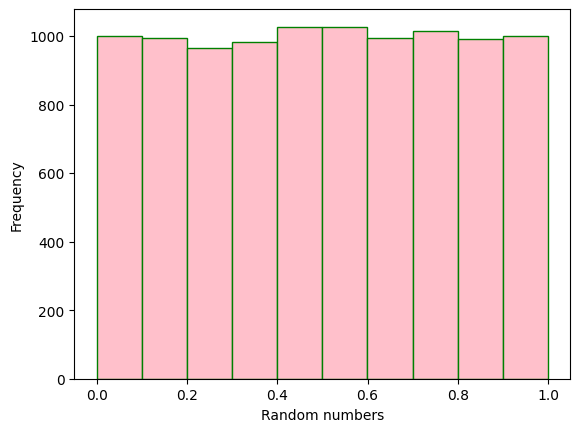

In [145]:
a = 16807
c = 0
n = 10000
x0 = 3
M = 2**32

lcg_values3 = LCG(x0, a, c, M, n)

# Plot the histograms of the generated random numbers
classes = 10

plt.hist(lcg_values3, bins=classes, edgecolor='green',color='pink')
plt.xlabel('Random numbers')
plt.ylabel('Frequency')
plt.show()

In [146]:
# Chi-Square test

from scipy.stats import chi2

Range = np.max(lcg_values3) - np.min(lcg_values3)
bin_width = Range / classes #Divide the Range into Equal Bins
bin_edges = np.linspace(0, 1, classes + 1) #defines equally spaced bin edges over the full interval [0,1], creates 11 edges → which means 10 bins

# Count observed frequencies in generated data
observed, _ = np.histogram(lcg_values3, bins=bin_edges) #frequency vector: How many of your generated values fell into each bin

# Calculate the expected frequency of each bin assuming uniform distribution
# Will be the same for every bin
expected = np.full(classes, n / classes)

# Compute Chi-squared test statistic
T = np.sum((observed - expected) ** 2 / expected)
print(f"The observed test statistic is: {T:.4f}") # The observed test statistic is: 10.5280

# Degrees of freedom
df = classes - 1
alpha = 0.05

# Critical value from chi-squared distribution
chi_crit = chi2.ppf(1 - alpha, df)
print(f"The critical value is: {chi_crit:.4f}") # The critical value is: 16.9190

# P-value
p_value = chi2.sf(T, df)
print(f"The p-value is: {p_value:.4f}") # The p-value is: 0.3095

The observed test statistic is: 3.3720
The critical value is: 16.9190
The p-value is: 0.9477


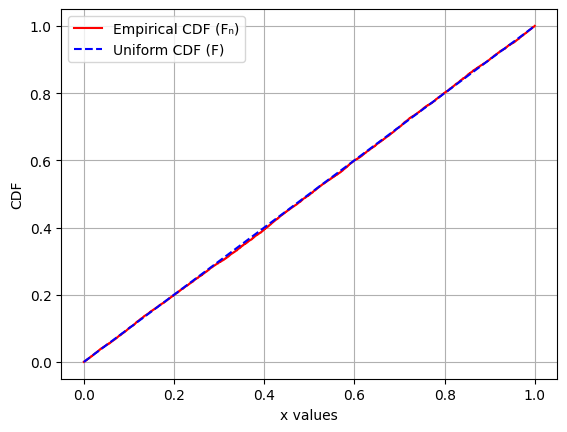

In [149]:
# Kolmogorov-Smirnov test
import numpy as np
import matplotlib.pyplot as plt

# Assuming lcg_values is already generated and normalized to [0,1)
lcg_sorted3 = np.sort(lcg_values3)  # sort values for EDF
n = len(lcg_values3)

# Empirical CDF: y = i/n for i = 1 to n
empirical_cdf3 = np.arange(1, n + 1) / n

# Theoretical CDF of Uniform(0,1) = x
theoretical_cdf3 = lcg_sorted3  # since F(x) = x for uniform(0,1)

# Step 4: Plotting
plt.step(lcg_sorted3, empirical_cdf3, where='post', label='Empirical CDF (Fₙ)', color='red')
plt.plot(theoretical_cdf3, theoretical_cdf3, label='Uniform CDF (F)', color='blue', linestyle='--')
#plt.title("Kolmogorov-Smirnov Test Visualization")
plt.xlabel("x values")
plt.ylabel("CDF")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Compute test statistic
D_n = np.max( np.abs( empirical_cdf3 - theoretical_cdf3 ) )
n = len(theoretical_cdf3)
test = ( np.sqrt(n) + 0.12 + 0.11 / np.sqrt(n) ) * D_n

print(f"The test statistic is: {test:.4f}.") # The test statistic is: 0.7212
print("For significance level of 0.950 we have the critical value as 1.358.") # For significance level of 0.950 we have the critical value as 1.358


The test statistic is: 0.7212.
For significance level of 0.950 we have the critical value as 1.358.


In [158]:
# Run test II
def run_lengths(vector):
    count = 0
    max_length = 0  # Track the maximum length of an increasing sequence
    current_length = 1  # Initialize the length of the current increasing sequence
    R = [0] * 6  # Initialize the vector to record lengths of increasing sequences

    for i in range(1, len(vector)):
        if vector[i] > vector[i - 1]:
            count += 1
            current_length += 1  # Increase the length of the current increasing sequence
        else:
            if current_length >= 6:
                R[5] += 1  # Increment the count for lengths greater than or equal to 6
            else:
                R[current_length - 1] += 1  # Increment the count for lengths less than 6
            max_length = max(max_length, current_length)  # Update the maximum length if needed
            current_length = 1  # Reset the length of the current increasing sequence
    
    # Check if the last sequence is longer than any previous sequences
    if current_length >= 6:
        R[5] += 1
    else:
        R[current_length - 1] += 1

    return R

# Input generated numbers
R = run_lengths(lcg_values3)
print("R vector:", R)


R vector: [1608, 2103, 910, 271, 59, 12]


In [159]:
# Define A and B
A = np.array([[4529.4, 9044.9, 13568, 18091, 22615, 27892],
              [9044.9, 18097, 27139, 36187, 45234, 55789],
              [13568, 27139, 40721, 54281, 67852, 83685],
              [18091, 36187, 54281, 72414, 90470, 111580],
              [22615, 45234, 67852, 90470, 113262, 139476],
              [27892, 55789, 83685, 111580, 139476, 172860]])

B = np.array([1/6, 5/24, 11/120, 19/720, 29/5040, 1/840])

# Compute test statistic
n = len(lcg_values3)
mat_mul = ( R - n * B ).T @ A @ ( R - n * B )
Z = 1 / (n - 6) * mat_mul
print(f"The test statistic is: {Z:.4f}") # The test statistic is: 7.1088

# Calculate critical value using df=6
# Use significance of alpha=0.05
df = 6
alpha = 0.05
chi_squared = chi2.ppf(1 - alpha, df)
print(f"The critical value is: {chi_squared:.4f}") # The critical value is: 12.5916

# Calculate the p-value under the observed test statistic
p_value = chi2.sf(Z, df)
print(f"The p-value is: {p_value:.4f}") # The p-value is: 0.3109

The test statistic is: 7.1088
The critical value is: 12.5916
The p-value is: 0.3109


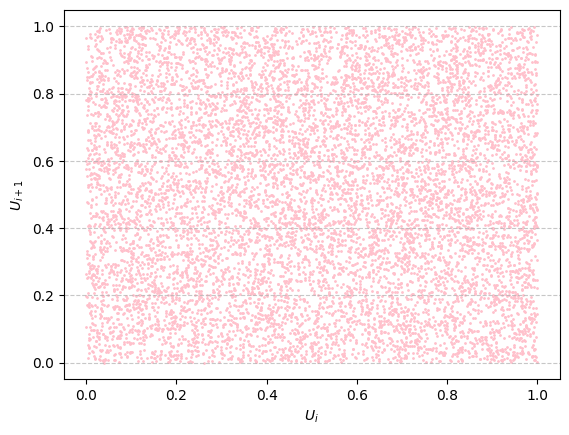

In [155]:
U_i = lcg_values3[:-1]
U_i_plus_1 = lcg_values3[1:]

# Scatter plot
plt.scatter(U_i, U_i_plus_1, color='pink', s=1)
#plt.title("Scatter plot of (Uᵢ, Uᵢ₊₁)")
plt.xlabel(r'$U_{i}$')
plt.ylabel(r'$U_{i+1}$')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 3. You were asked to simulate one sample and perform tests on this sample. Discuss the sufficiency of this approach and take action, if needed.

For large M = 9973  # a large prime

In [104]:
# Re-run the setup to recreate the summary table for user display outside ace_tools

import numpy as np
import matplotlib.pyplot as plt
from math import gcd
import pandas as pd

# Define LCG generator
def LCG(x0, a, c, M, n):
    x = x0
    result = []
    for _ in range(n):
        x = (a * x + c) % M
        result.append(x / M)  # Normalize to [0, 1)
    return result

# Parameter sets (bad and good)
parameter_sets = [
    {"a": 5, "c": 1, "M": 16},
    {"a": 11, "c": 0, "M": 32},
    {"a": 129, "c": 26461, "M": 65536},
    {"a": 48271, "c": 0, "M": 2**31 - 1},
    {"a": 16807, "c": 0, "M": 2**31 - 1}
]

# Generate values and analyze each
n = 10000
x0 = 3
summary_data = []

for params in parameter_sets:
    a, c, M = params["a"], params["c"], params["M"]
    lcg_values = LCG(x0, a, c, M, n)

    # Histogram uniformity check (simple: standard deviation of bin heights)
    counts, _ = np.histogram(lcg_values, bins=10, range=(0, 1))
    hist_std = np.std(counts)

    # Visual correlation: variance of the differences between points
    u_i = np.array(lcg_values[:-1])
    u_ip1 = np.array(lcg_values[1:])
    corr_std = np.std(u_ip1 - u_i)

    # GCD of c and M (for full period property)
    full_period = gcd(c, M) == 1 if c != 0 else "N/A"

    summary_data.append({
        "a": a,
        "c": c,
        "M": M,
        "hist_std_dev": round(hist_std, 2),
        "corr_diff_std": round(corr_std, 4),
        "gcd(c, M)=1": full_period
    })

df = pd.DataFrame(summary_data)
df


,a,c,M,hist_std_dev,corr_diff_std,"gcd(c, M)=1"
0,5,1,16,306.19,0.3480,True
1,11,0,32,935.41,0.3125,N/A
2,129,26461,65536,8.32,0.4086,True
3,48271,0,2147483647,34.14,0.4072,N/A
4,16807,0,2147483647,27.32,0.4058,N/A


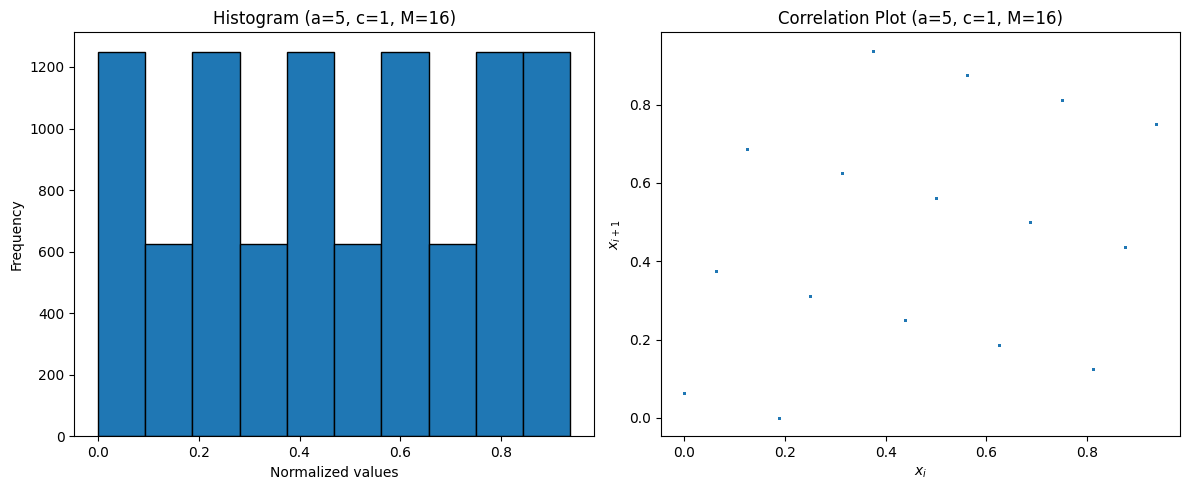

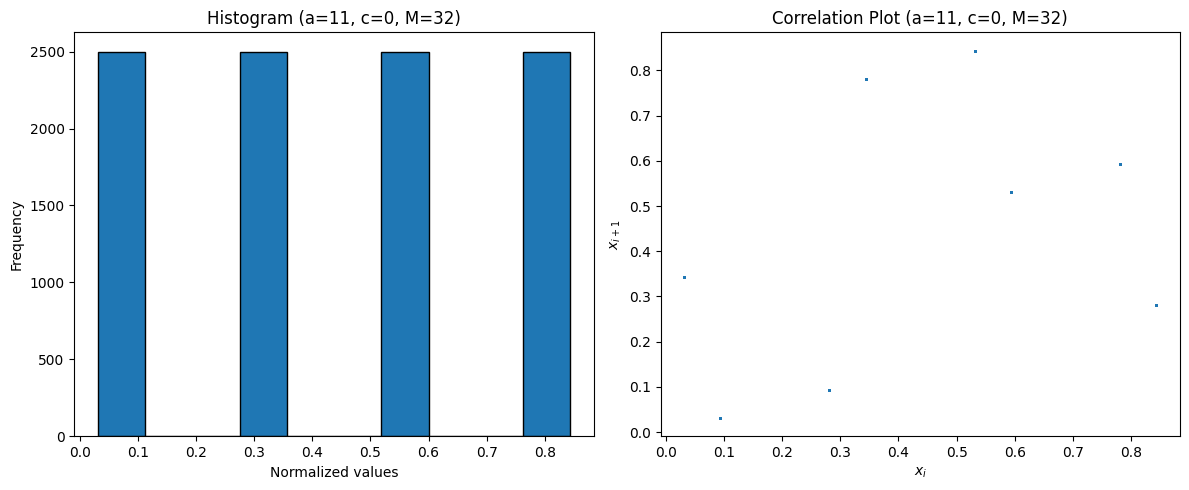

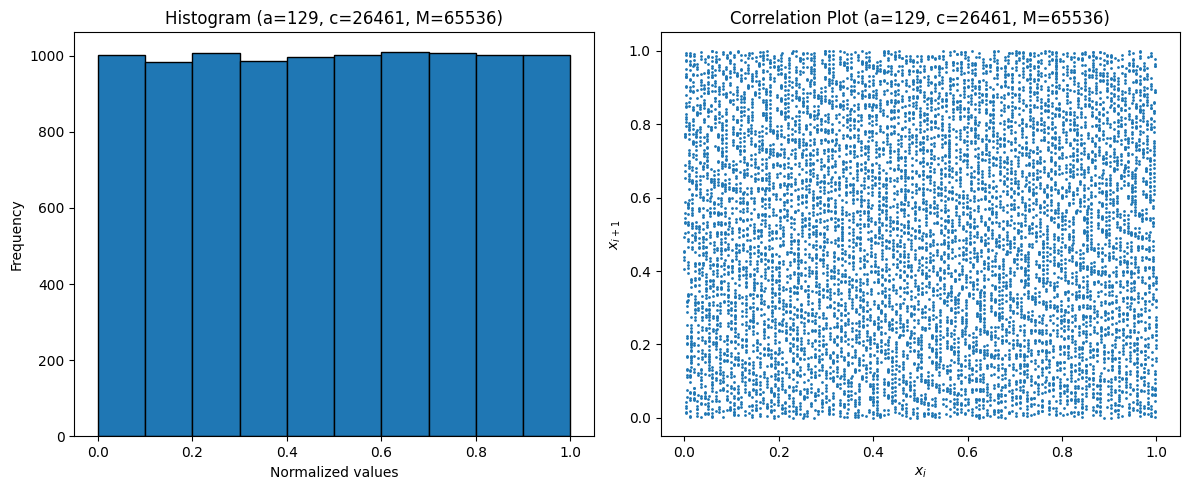

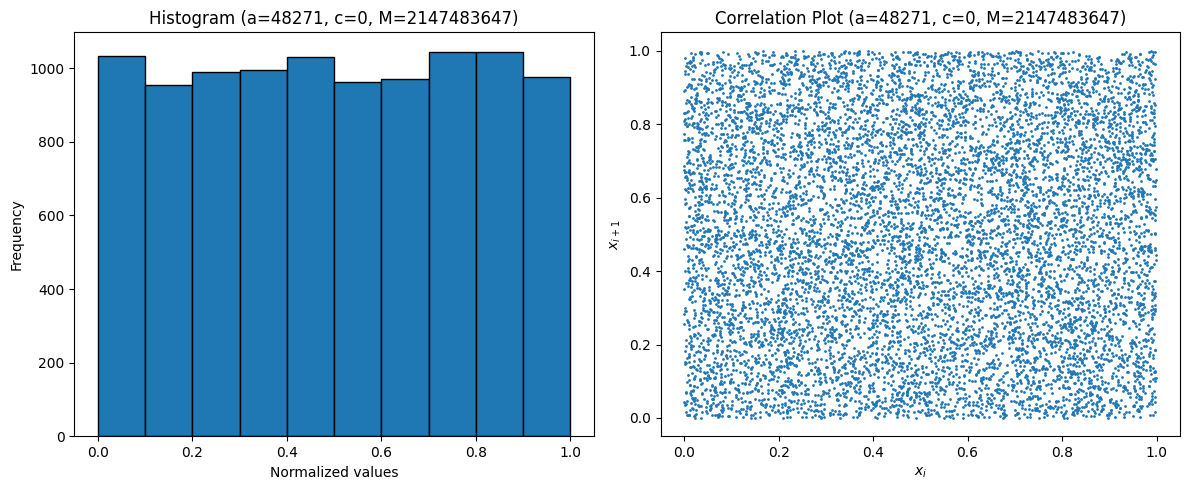

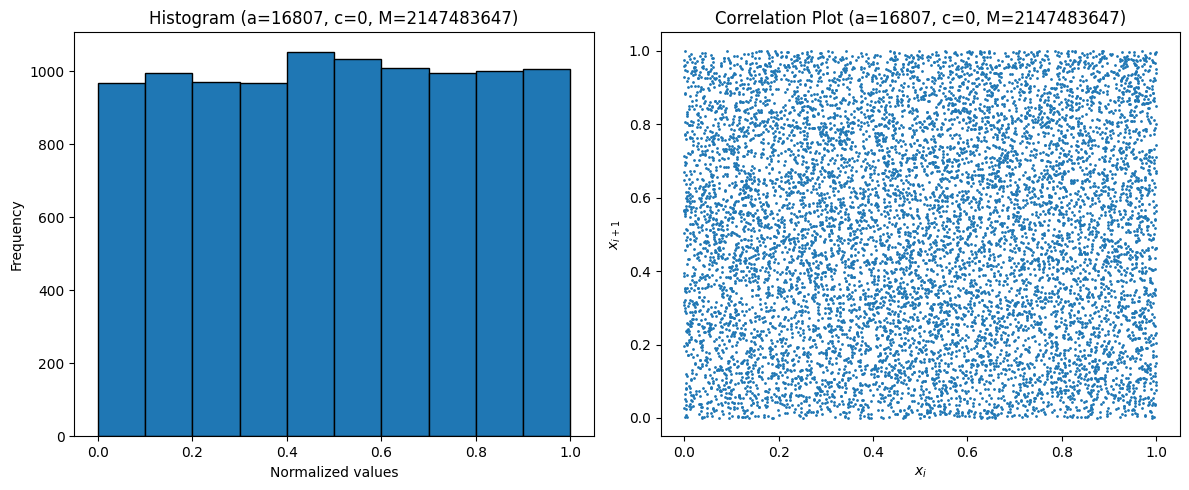

In [105]:
# Plot histogram and scatter plot for each of the parameter sets

def plot_histogram_and_correlation(lcg_values, title_suffix):
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(lcg_values, bins=10, edgecolor='black')
    plt.title(f"Histogram {title_suffix}")
    plt.xlabel("Normalized values")
    plt.ylabel("Frequency")

    # Correlation Scatter Plot
    plt.subplot(1, 2, 2)
    plt.scatter(lcg_values[:-1], lcg_values[1:], s=1)
    plt.title(f"Correlation Plot {title_suffix}")
    plt.xlabel("$x_i$")
    plt.ylabel("$x_{i+1}$")
    plt.tight_layout()
    plt.show()

# Generate and plot for each
for params in parameter_sets:
    a, c, M = params["a"], params["c"], params["M"]
    lcg_values = LCG(x0, a, c, M, n)
    title_suffix = f"(a={a}, c={c}, M={M})"
    plot_histogram_and_correlation(lcg_values, title_suffix)
